<a href="https://colab.research.google.com/github/pragya-gupta7/stock-prediction-project/blob/main/stock_prediction_8_10_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction using Time Series Data

## Importing & Inspecting Data


In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/pragya-gupta7/stock-prediction-project/refs/heads/main/stock_price.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()


,日付け,終値,始値,高値,安値,出来高,変化率 %
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%


For ease of analysis further, Columns are renamed

In [2]:
df.columns = ['Date', 'Closing Price', 'Opening Price', 'High Price', 'Low Price', 'Volume', 'Percentage Change (%)']
print(df.head())
df.info()

         Date  Closing Price  Opening Price  High Price  Low Price   Volume  \
0  2024-08-01          156.3          159.3       159.4      156.1   79.15M   
1  2024-07-31          160.4          158.2       160.7      158.1  173.91M   
2  2024-07-30          158.7          158.8       159.2      158.0  138.14M   
3  2024-07-29          159.7          158.7       160.2      158.4  126.28M   
4  2024-07-26          157.9          159.3       159.6      157.9  155.08M   

  Percentage Change (%)  
0                -2.56%  
1                 1.07%  
2                -0.63%  
3                 1.14%  
4                -0.13%  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   9202 non-null   object 
 1   Closing Price          9202 non-null   float64
 2   Opening Price          9202 non-null   float64
 3 

## Data Preprocessing
We need to convert the data type of Volume and Percentage change in float64 to make it compatible for further analysis. After that, we will explore the data.

In [3]:
def convert_volume(value):
  if isinstance(value, str) and value.endswith('M'):
    return float(value[:-1]) * 1e6
  elif isinstance(value, str) and value.endswith('B'):
    return float(value[:-1]) * 1e9
  else:
    return float(value)

df['Volume'] = df['Volume'].apply(convert_volume)
df['Date'] = pd.to_datetime(df['Date'])
df['Percentage Change (%)'] = df['Percentage Change (%)'].str.rstrip('%').astype('float')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   9202 non-null   datetime64[ns]
 1   Closing Price          9202 non-null   float64       
 2   Opening Price          9202 non-null   float64       
 3   High Price             9202 non-null   float64       
 4   Low Price              9202 non-null   float64       
 5   Volume                 9202 non-null   float64       
 6   Percentage Change (%)  9202 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 503.4 KB


,Date,Closing Price,Opening Price,High Price,Low Price,Volume,Percentage Change (%)
0,2024-08-01,156.3,159.3,159.4,156.1,79150000.0,-2.56
1,2024-07-31,160.4,158.2,160.7,158.1,173910000.0,1.07
2,2024-07-30,158.7,158.8,159.2,158.0,138140000.0,-0.63
3,2024-07-29,159.7,158.7,160.2,158.4,126280000.0,1.14
4,2024-07-26,157.9,159.3,159.6,157.9,155080000.0,-0.13


In [4]:
#check for missing values
print(df.isnull().sum())
# Check for duplicates
print(df.duplicated().sum())
df.describe()

Date                     0
Closing Price            0
Opening Price            0
High Price               0
Low Price                0
Volume                   0
Percentage Change (%)    0
dtype: int64
0


,Date,Closing Price,Opening Price,High Price,Low Price,Volume,Percentage Change (%)
count,9202,9202.000000,9202.000000,9202.000000,9202.000000,9.202000e+03,9202.000000
mean,2005-10-21 08:44:04.642469248,92.180961,92.256183,93.176451,91.330146,1.726677e+08,0.017502
min,1987-02-12 00:00:00,33.000000,33.000000,33.200000,32.200000,9.340000e+06,-14.740000
25%,1996-06-06 06:00:00,52.000000,52.100000,52.800000,51.500000,8.073000e+07,-0.940000
50%,2005-10-11 12:00:00,85.100000,85.100000,86.050000,84.200000,1.540150e+08,0.000000
75%,2015-03-04 18:00:00,110.800000,110.800000,111.900000,109.275000,2.305225e+08,0.900000
max,2024-08-01 00:00:00,305.900000,309.800000,311.800000,303.900000,1.280000e+09,16.250000
std,NaN,50.452228,50.598215,51.049837,50.087405,1.251280e+08,1.876667


## Exploratory Data Analysis

In [5]:
import matplotlib.pyplot as plt

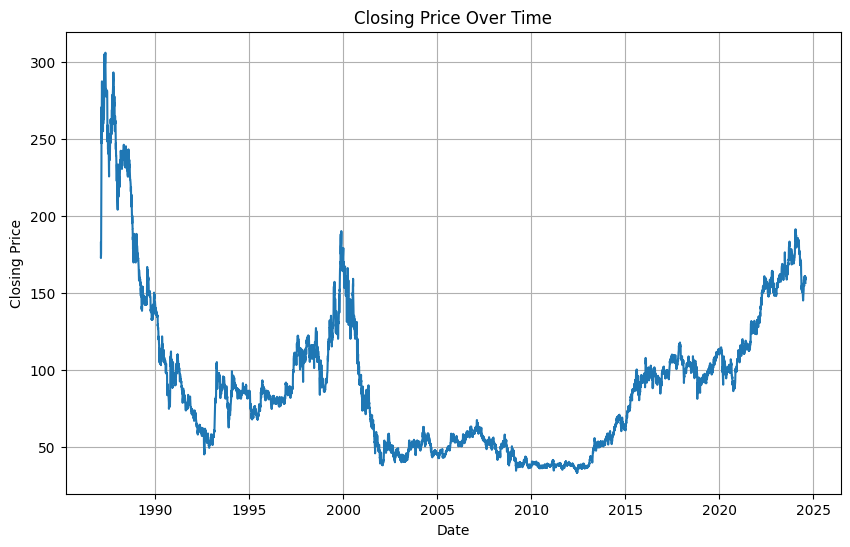

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Closing Price'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

#### Observations
<ul>
<li>In 1987 to 1998, the privatization created a surge in investor confidence, driving up stock prices as expectations for greater profitability and market efficiency grew.

<li>NTT benefited from the overall growth in the telecom industry from 1992-2000 and the inflated valuations of tech companies during the dot-com bubble, leading to a peak around 2000.

<li>The crash of the dot-com bubble (2000 to 2002) and economic challenges led to a sharp decline in NTT’s stock price, reflecting broader market trends affecting telecom and tech companies worldwide.

 <li>Stable but modest growth during the telecom industry’s maturation phase kept NTT’s stock price relatively constant during the period from 2002 to 2015

 <li>Increased investments in new technologies, global expansion, and economic improvements in Japan contributed to NTT’s stock price increase during the period from 2015 to 2020.

 <li>The effects of the pandemic, coupled with large investments in 5G technology, initially caused a decline. However, recovery and optimism surrounding new technology stabilized NTT’s stock price at a higher level than before.
 </ul>

In [7]:
print(f'Correlation between Opening price and Closing price: {df["Opening Price"].corr(df["Closing Price"])}')
print(f'Correlation between High price and Closing price: {df["High Price"].corr(df["Closing Price"])}')
print(f'Correlation between Low price and Closing price: {df["Low Price"].corr(df["Closing Price"])}')
print(f'Correlation between Volume and Closing price: {df["Volume"].corr(df["Closing Price"])}')
print(f'Correlation between Percentage Change and Closing price: {df["Percentage Change (%)"].corr(df["Closing Price"])}')
print(f'Correlation between Percentage Change and High price: {df["Percentage Change (%)"].corr(df["High Price"])}')
print(f'Correlation between Percentage Change and Low price: {df["Percentage Change (%)"].corr(df["Low Price"])}')
print(f'Correlation between Percentage Change and Opening price: {df["Percentage Change (%)"].corr(df["Opening Price"])}')

Correlation between Opening price and Closing price: 0.9995472991150517
Correlation between High price and Closing price: 0.9997948341469205
Correlation between Low price and Closing price: 0.9997537735028146
Correlation between Volume and Closing price: -0.3175082210565904
Correlation between Percentage Change and Closing price: 0.01716564395512396
Correlation between Percentage Change and High price: 0.007791892888723888
Correlation between Percentage Change and Low price: 0.005815371827316039
Correlation between Percentage Change and Opening price: -0.0028602174797919756


<ul><li> There is strong correlation among Closing price (CP), high price (HP), Low price (LP) and opening price (OP). We will not include all these variables separately in a prediction model as they are highly correlated.

<li>Volume has negative correlation which is interesting as it suggests volume of trades increases, the stock price tends to fall.

<li>Percentage Change has a negligible correlation with Closing Price (0.0172). This variable might not add much predictive value, but it could still be useful in more complex models.</ul>

In [8]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the 'Closing Price' column
result = adfuller(df['Closing Price'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpret the results
if result[1] <= 0.05:
  print('The time series is likely stationary.')
else:
  print('The time series is likely non-stationary.')

ADF Statistic: -1.6418950595274633
p-value: 0.46127074146991426
Critical Values: {'1%': -3.4310631630047332, '5%': -2.8618551724921812, '10%': -2.5669377612579782}
The time series is likely non-stationary.


The time series is non-stationary, meaning it has trends or seasonality. This will affect our model selection, as many time-series models (like ARIMA) require stationary data.

#### Detecting Trends and seasonality

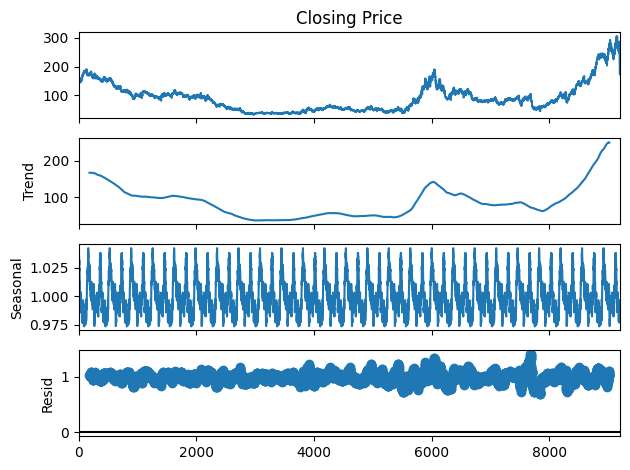

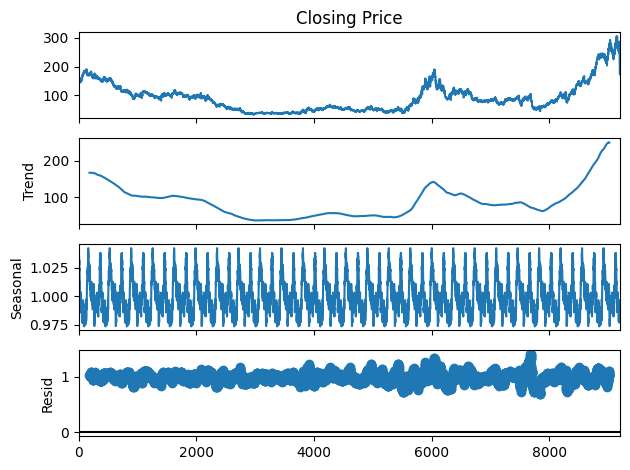

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Closing Price'], model='multiplicative', period=365)  # 'Close' is the stock price column
decomposition.plot()


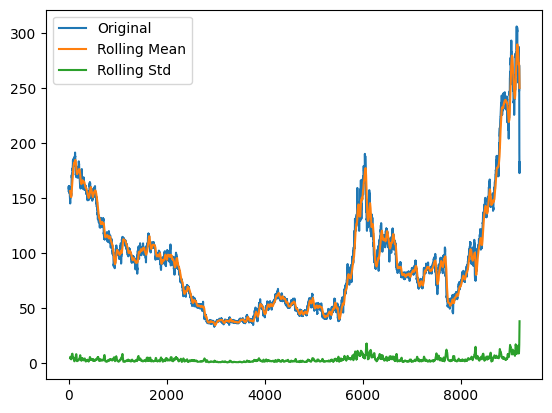

In [10]:
rolling_mean = df['Closing Price'].rolling(window=30).mean()  # 30-day moving average
rolling_std = df['Closing Price'].rolling(window=30).std()

plt.plot(df['Closing Price'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.show()


The rolling mean closely follows the original data, suggesting the stock price has substantial long-term trends. The large increase in the rolling mean toward the end indicates a strong upward trend in recent periods.

For most of the time series, the volatility remains low, which indicates relatively stable stock prices during these periods.

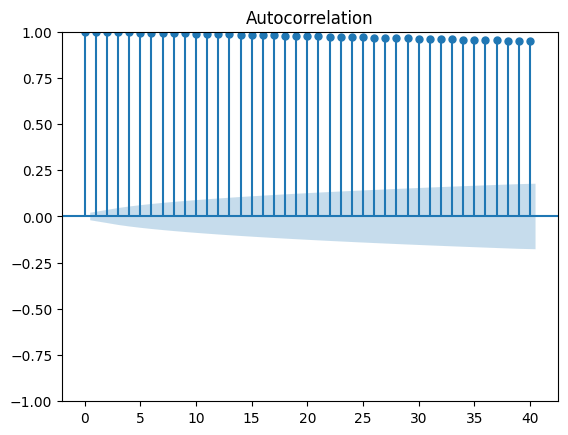

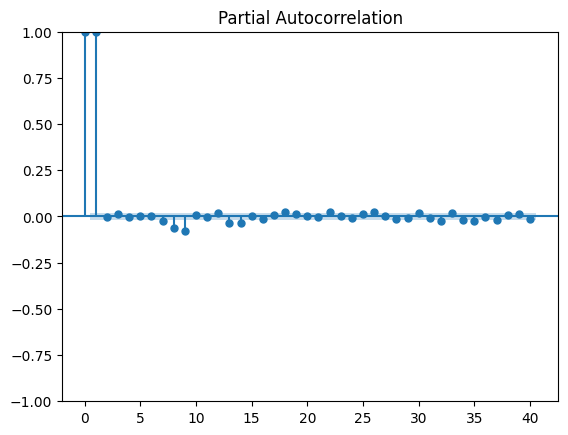

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Closing Price'])
plot_pacf(df['Closing Price'])
plt.show()


The ACF shows strong, persistent positive autocorrelations across all lags, remaining close to 1 without significant decay.
This is typical of a non-stationary series, where past values have a long-lasting effect on future values.

The PACF plot shows significant spikes at lag 1 and lag 2, and then it quickly drops off to near zero for higher lags.
This pattern suggests that the series could be well-modeled by an AR(2) process—an autoregressive model where the current value depends on the two previous values. Since there are only significant spikes at lag 1 and 2, higher-order lags aren't important. Let's apply differencing to make data stationary.

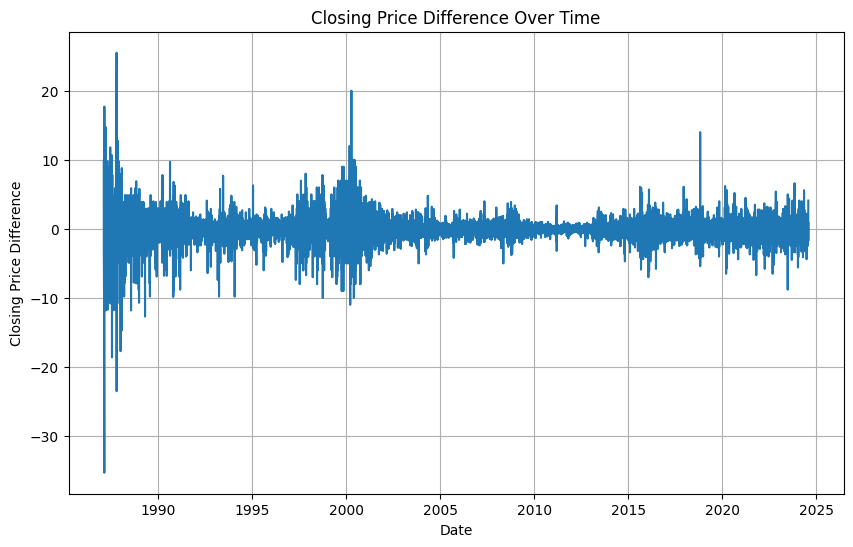

ADF Statistic: -15.765887132120282
p-value: 1.1766290673801534e-28
Critical Values: {'1%': -3.4310631630047332, '5%': -2.8618551724921812, '10%': -2.5669377612579782}


In [12]:
df.set_index('Date', inplace=True)
df['Diff_Closing_Price']=df['Closing Price'].diff()
df.dropna(inplace=True)


plt.figure(figsize=(10, 6))
plt.plot(df['Diff_Closing_Price'])
plt.title('Closing Price Difference Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price Difference')
plt.grid(True)
plt.show()

adf_result = adfuller(df['Diff_Closing_Price'].dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

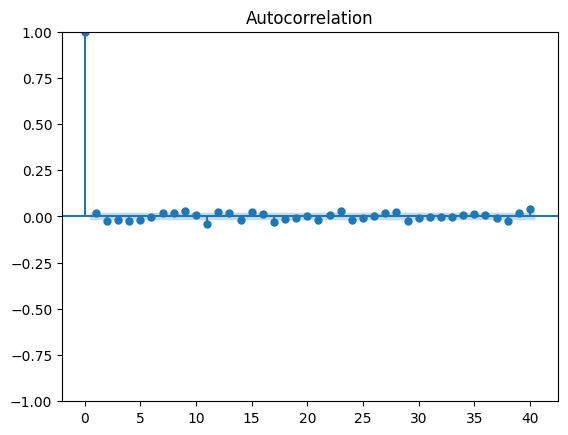

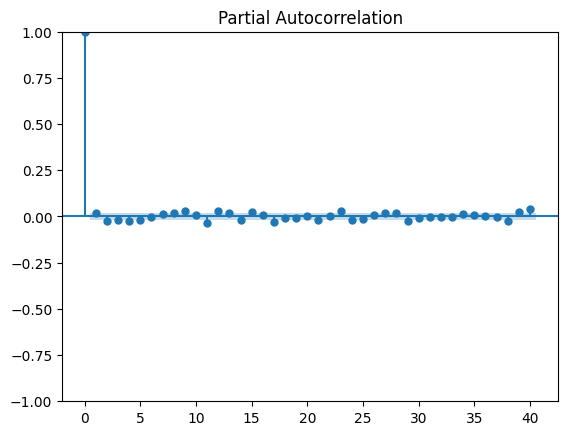

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Diff_Closing_Price'])
plot_pacf(df['Diff_Closing_Price'])
plt.show()

Let's try ARIMA model with parameters (2,1,0)

In [14]:
df.head()

,Closing Price,Opening Price,High Price,Low Price,Volume,Percentage Change (%),Diff_Closing_Price
Date,,,,,,,
2024-07-31,160.4,158.2,160.7,158.1,173910000.0,1.07,4.1
2024-07-30,158.7,158.8,159.2,158.0,138140000.0,-0.63,-1.7
2024-07-29,159.7,158.7,160.2,158.4,126280000.0,1.14,1.0
2024-07-26,157.9,159.3,159.6,157.9,155080000.0,-0.13,-1.8
2024-07-25,158.1,157.0,159.0,156.8,190620000.0,-0.25,0.2


## SARIMA model with available features

We chosen this model as data is convertible to stationary by differencing. And based on previous analysis, data contains some seasonality and trends. Thus instead of ARIMA (simple model, can't run better with trends and seasonality), SARIMA is chosen.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

Mean Absolute Error (MAE): 4.545198729068011
Mean Squared Error (MSE): 27.35731129824625
Root Mean Squared Error (RMSE): 5.230421713231759


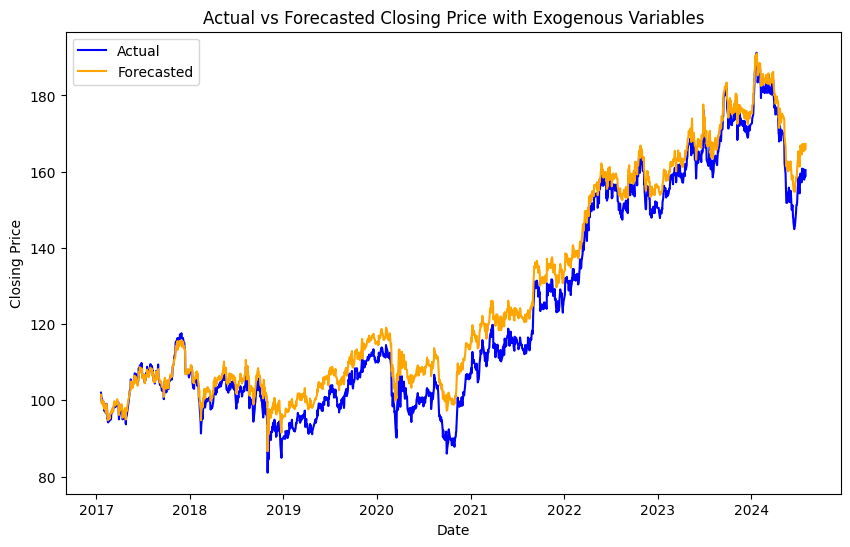

In [15]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

df=df[::-1]
# Assuming your DataFrame `df` contains the relevant columns
# Drop the 'Diff_Closing_Price' column
df=df.drop(columns=['Diff_Closing_Price'])

# Step 1: Split the data into training and test sets
train_size = int(len(df) * 0.8)  # 80% for training, 20% for testing
train, test = df[:train_size], df[train_size:]

# Step 2: Define the SARIMA model
# In this example, we'll use p=2, d=1, q=0 and seasonal orders
model = sm.tsa.SARIMAX(train['Closing Price'],
                        exog=train[['Opening Price', 'High Price',
                                    'Low Price', 'Volume', 'Percentage Change (%)']],
                        order=(2, 1, 0),
                        seasonal_order=(1, 1, 1, 30))

# Step 3: Fit the SARIMA model to the training data
fitted_model = model.fit()

# Step 4: Forecast the test set period (make out-of-sample predictions)
forecast_steps = len(test)
exog_test = test[['Opening Price', 'High Price',
                  'Low Price', 'Volume', 'Percentage Change (%)']]  # Get the exogenous variables for the test period
forecast = fitted_model.forecast(steps=forecast_steps, exog=exog_test)

# Step 5: Calculate evaluation metrics
mae = mean_absolute_error(test['Closing Price'], forecast)
mse = mean_squared_error(test['Closing Price'], forecast)
rmse = np.sqrt(mse)


# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


# Step 6: Visualize the forecast vs actual data
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Closing Price'], label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecasted', color='orange')
plt.title('Actual vs Forecasted Closing Price with Exogenous Variables')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


## Feature Engineering
Now, let's dig deeper and understand more about data by adding more features to capture model patterns and relationships.

A. Lagged Features (Lag Variables)
<br>Reason: Since stock prices often exhibit autocorrelation (which we've already confirmed with AR(2)). Thus, lag-1 and lag-2 have direct impact on predicting future prices. For experimentation, lag-7 and lag-30 is also calculated.

B. Rolling Averages and Exponential Moving Averages
<br>Reason: Moving averages smooth the data and capture medium-to-long-term trends. The exponential moving average (EMA) gives more weight to recent data and responds faster to changes, which could be crucial for short-term forecasting. We have already checked plot earlier for 30 days rolling mean and std deviation which was strong fit. We added 7 days for experimentation.

C. Relative Strength Index (RSI)
<br>Reason: RSI is a momentum indicator that measures the magnitude of recent price changes to evaluate whether a stock is overbought or oversold. It often correlates with short-term price movements, making it useful for stock prediction. RSI can indicate reversal points, which is valuable for predicting future price dips or rises.

D. Normalized Volume
<br>Reason: Volume can be a leading indicator of price movements. We observed a negative correlation (-0.317) earlier, it's worth using volume as a feature. During high-volume days, if the price tends to fall, the model might learn to adjust its predictions accordingly. Since volume can vary greatly, it’s a good idea to normalize it or scale it before including it in the model.

E. Percentage Change
<br>Reason: Percentage change captures the relative day-to-day changes in stock price. This can be helpful in capturing momentum or periods of rapid shifts in stock price. We will include it as is.

F. Price Spread & Price Range
<br>Reason: It is especially relevant if stock exhibits high volatility on certain days.

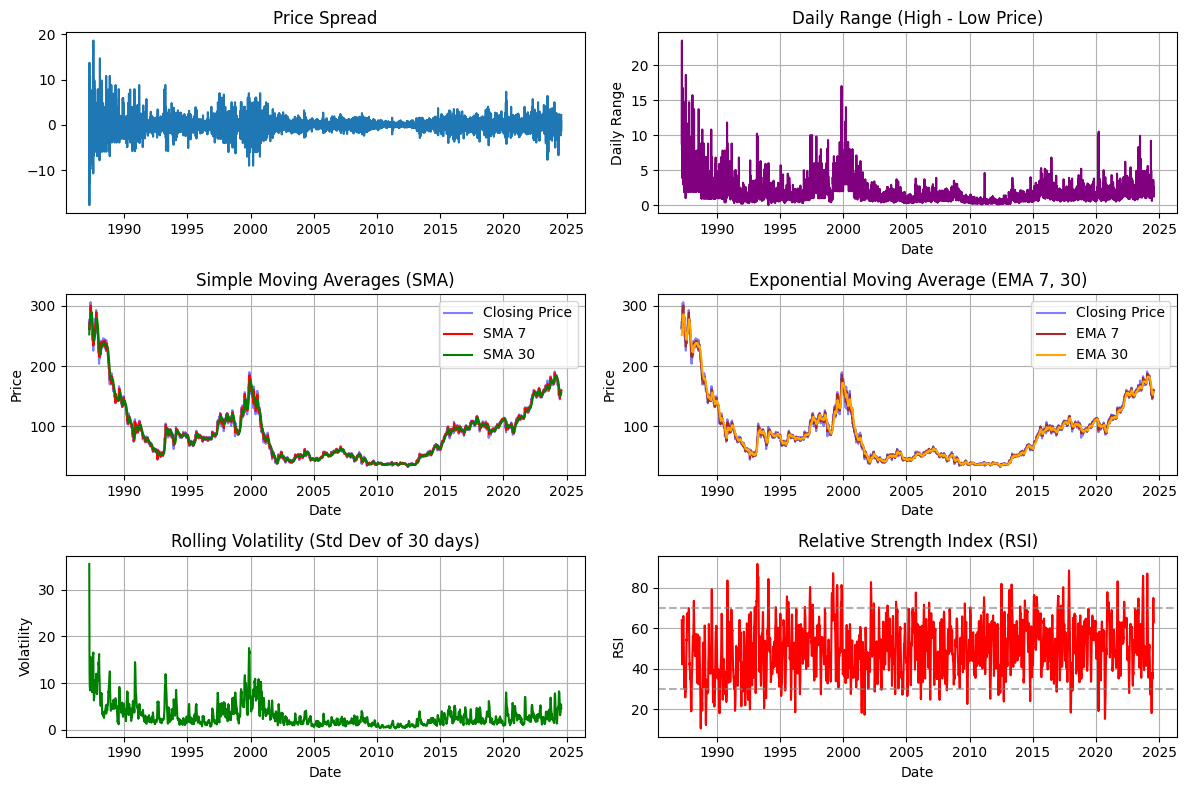

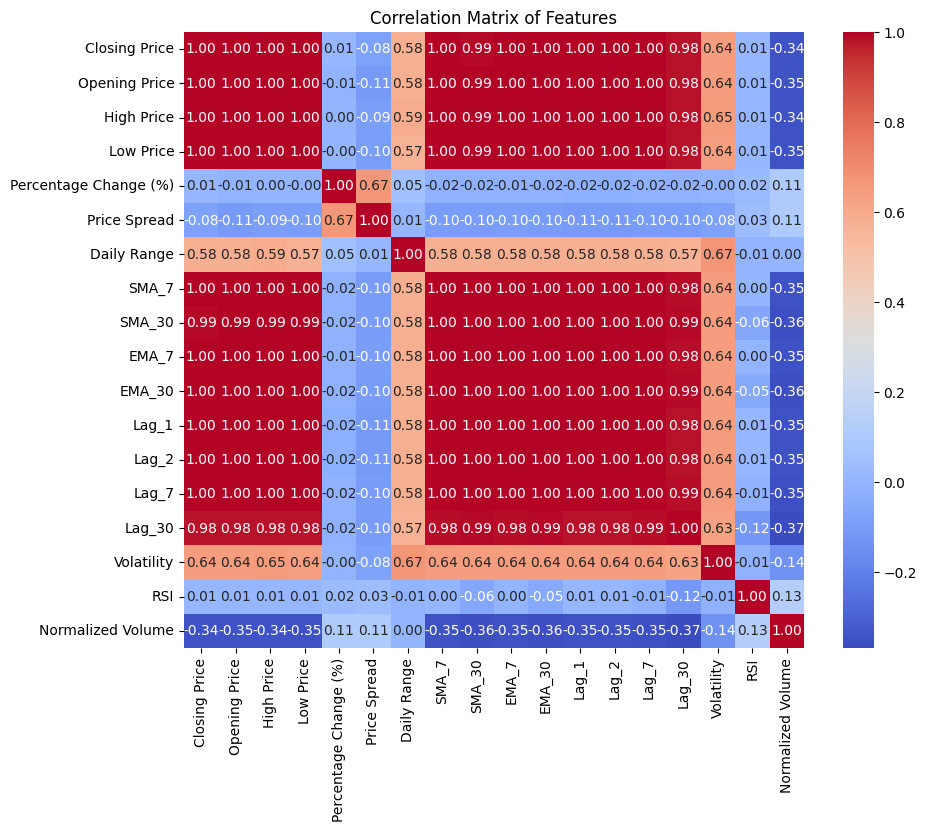

In [16]:
data=df.copy()
from sklearn.preprocessing import MinMaxScaler

# 1. Price Spread (Closing Price - Opening Price)
data['Price Spread'] = data['Closing Price'] - data['Opening Price']

# 2. Daily Range (High Price - Low Price)
data['Daily Range'] = data['High Price'] - data['Low Price']

# 3. Moving Averages (Simple Moving Averages for 7,30 days)
data['SMA_7'] = data['Closing Price'].rolling(window=7).mean()
data['SMA_30'] = data['Closing Price'].rolling(window=30).mean()

# 4. Exponential Moving Average (EMA for 7,30 days)
data['EMA_7'] = data['Closing Price'].ewm(span=7, adjust=False).mean()
data['EMA_30'] = data['Closing Price'].ewm(span=30, adjust=False).mean()

# 5. Lagged Features (Closing Price and Volume)
data['Lag_1'] = data['Closing Price'].shift(1)
data['Lag_2'] = data['Closing Price'].shift(2)
data['Lag_7'] = data['Closing Price'].shift(7)
data['Lag_30'] = data['Closing Price'].shift(30)

# 6. Rolling Volatility (Standard Deviation over 30-day window)
data['Volatility'] = data['Closing Price'].rolling(window=30).std()

# 7. Relative Strength Index (RSI)
delta = data['Closing Price'].diff(1)
gain = delta.where(delta > 0, 0).rolling(window=14).mean()
loss = -delta.where(delta < 0, 0).rolling(window=14).mean()

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# 8. Normalized Volume
scaler=MinMaxScaler()
data['Normalized Volume'] = scaler.fit_transform(data[['Volume']])

# Drop NaN values generated from rolling operations
data.dropna(inplace=True)

# Visualizing some of the features
plt.figure(figsize=(12, 8))

# Subplot 1: Price Spread
plt.subplot(3, 2, 1)
plt.plot(data.index, data['Price Spread'])
plt.title('Price Spread')

# Subplot 2: Daily Range
plt.subplot(3, 2, 2)
plt.plot(data.index, data['Daily Range'], color='purple')
plt.title('Daily Range (High - Low Price)')
plt.xlabel('Date')
plt.ylabel('Daily Range')
plt.grid()

# Subplot 3: 7-day and 30-day SMA
plt.subplot(3, 2, 3)
plt.plot(data.index, data['Closing Price'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(data.index, data['SMA_7'], label='SMA 7', color='red')
plt.plot(data.index, data['SMA_30'], label='SMA 30', color='green')
plt.title('Simple Moving Averages (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Subplot 4: Exponential Moving Average (EMA 7, 30)
plt.subplot(3, 2, 4)
plt.plot(data.index, data['Closing Price'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(data.index, data['EMA_7'], label='EMA 7', color='brown')
plt.plot(data.index, data['EMA_30'], label='EMA 30', color='orange')
plt.title('Exponential Moving Average (EMA 7, 30)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Subplot 5: Volatility (Rolling Std Dev)
plt.subplot(3, 2, 5)
plt.plot(data.index, data['Volatility'], color='green')
plt.title('Rolling Volatility (Std Dev of 30 days)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid()

# Subplot 6: RSI (Relative Strength Index)
plt.subplot(3, 2, 6)
plt.plot(data.index, data['RSI'], color='red')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(70, linestyle='--', color='gray', alpha=0.6)  # Overbought line
plt.axhline(30, linestyle='--', color='gray', alpha=0.6)  # Oversold line
plt.grid()

plt.tight_layout()
plt.show()

# Correlation matrix
import seaborn as sns

# Dropping non-numeric columns if any for correlation
corr_data = data.drop(columns=['Volume'])  # Drop Volume if it's not numeric, adjust if needed

# Calculate the correlation matrix
corr_matrix = corr_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()


## Relevant Features and Model Training: SARIMA
Based on this correlation plot, we can select relevant features for our model: Daily Range, SMA_30, EMA_7, EMA_30, Lag_1, Lag_2, Lag_7, Volatility, Normalized Volume.

Let's train model with features which are engineered to check if accuracy can be improved or not.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

Mean Absolute Error (MAE): 24.021337323326797
Mean Squared Error (MSE): 833.2088565599335
Root Mean Squared Error (RMSE): 28.865357378004752


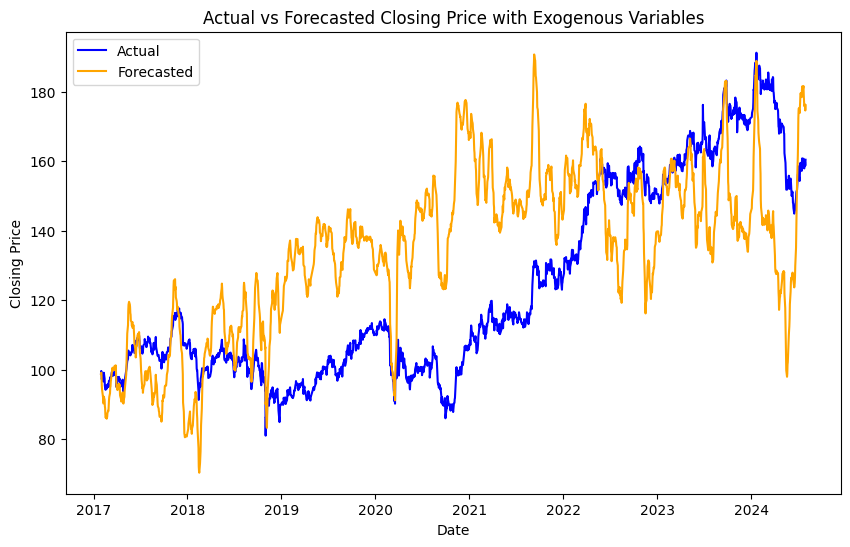

In [17]:


#df = df.drop(columns=['Diff_Closing_Price'])
# Assuming your DataFrame `df` contains the relevant columns
# Step 1: Split the data into training and test sets
train_size = int(len(data) * 0.8)  # 80% for training, 20% for testing
train, test = data[:train_size], data[train_size:]

# Step 2: Define the SARIMA model
# In this example, we'll use p=2, d=1, q=0 and seasonal orders
model = sm.tsa.SARIMAX(train['Closing Price'],
                        exog=train[['Daily Range','SMA_30','EMA_7', 'EMA_30','Lag_1','Volatility','Normalized Volume']],
                        order=(2, 1, 0),
                        seasonal_order=(1, 1, 1, 30))

# Step 3: Fit the SARIMA model to the training data
fitted_model = model.fit()

# Step 4: Forecast the test set period (make out-of-sample predictions)
forecast_steps = len(test)
exog_test = test[['Daily Range','SMA_30','EMA_7', 'EMA_30','Lag_1','Volatility','Normalized Volume']]  # Get the exogenous variables for the test period
forecast = fitted_model.forecast(steps=forecast_steps, exog=exog_test)

# Step 5: Calculate evaluation metrics
mae = mean_absolute_error(test['Closing Price'], forecast)
mse = mean_squared_error(test['Closing Price'], forecast)
rmse = np.sqrt(mse)


# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


# Step 6: Visualize the forecast vs actual data
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Closing Price'], label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecasted', color='orange')
plt.title('Actual vs Forecasted Closing Price with Exogenous Variables')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


## LSTM Model

As we can see there is wide difference between actual and predicted value, let's try with LSTM model as it can capture past relationships of data which is relevant in stock price prediction. We will first check with already available data then we will swi

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0048 - val_loss: 2.2494e-04
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.0320e-04 - val_loss: 2.4110e-04
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.7387e-04 - val_loss: 2.0647e-04
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.0761e-04 - val_loss: 1.5273e-04
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 5.2323e-04 - val_loss: 2.5485e-04
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 5.2972e-04 - val_loss: 1.2724e-04
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.6643e-04 - val_loss: 1.3477e-04
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.9182e-04 - val_loss: 2.4027e-04
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.3212e-04 - val_loss: 2.8247e-04
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.0649e-04 - val_loss: 1.0015e-04
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
57/57 ━━━━━━━━━━━

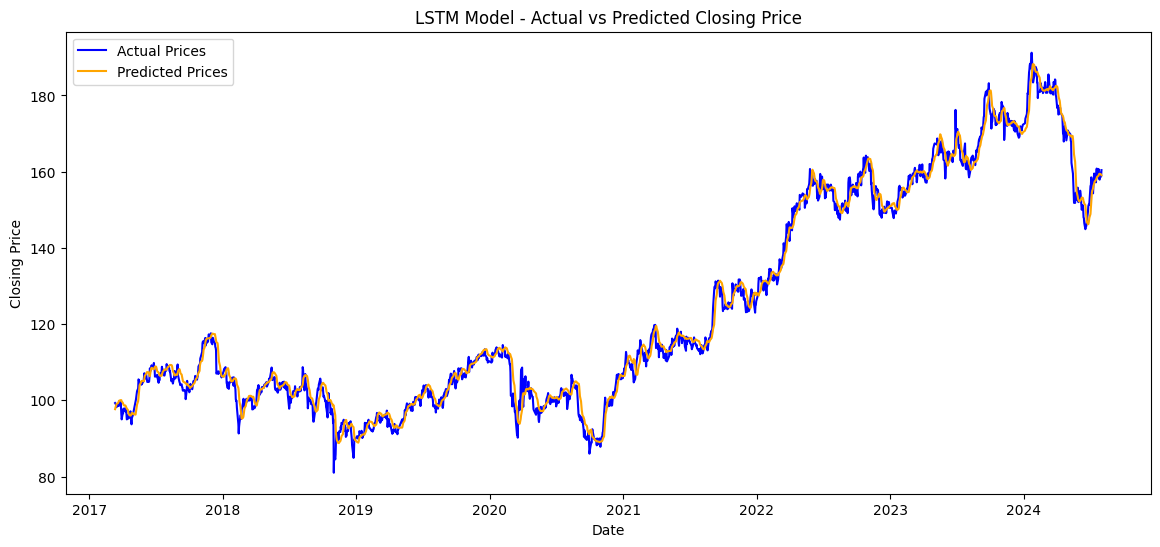

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Assume your dataframe is `data` with DateTimeIndex and already cleaned up features
df2 = data[['Closing Price', 'Opening Price','High Price','Low Price', 'Normalized Volume']]

# Step 1: Scaling the Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df2)

# Step 2: Create training and test data
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Step 3: Create data with time steps (LSTM input format)
def create_dataset(dataset, time_step=30):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, :])  # Take 'time_step' number of previous time steps
        y.append(dataset[i, 0])  # Predict the 'Closing Price' (index 0 in the dataset)
    return np.array(X), np.array(y)

# Reshape data for LSTM (30 previous time steps)
time_step = 30  # You can adjust the window size
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Step 4: Reshape the input to LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Step 5: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # To avoid overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))  # Fully connected layer
model.add(Dense(units=1))   # Output layer (predicting Closing Price)

# Step 6: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train the LSTM model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

# Step 8: Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Step 9: Inverse transform the predictions back to original scale
train_predict = scaler.inverse_transform(np.concatenate([train_predict, np.zeros((train_predict.shape[0], df2.shape[1]-1))], axis=1))[:, 0]
test_predict = scaler.inverse_transform(np.concatenate([test_predict, np.zeros((test_predict.shape[0], df2.shape[1]-1))], axis=1))[:, 0]
y_train = scaler.inverse_transform(np.concatenate([y_train.reshape(-1,1), np.zeros((y_train.shape[0], df2.shape[1]-1))], axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate([y_test.reshape(-1,1), np.zeros((y_test.shape[0], df2.shape[1]-1))], axis=1))[:, 0]

# Step 10: Evaluate the model
train_rmse = np.sqrt(np.mean((train_predict - y_train)**2))
test_rmse = np.sqrt(np.mean((test_predict - y_test)**2))
print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Step 11: Plot the results
plt.figure(figsize=(14,6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(df.index[-len(y_test):], test_predict, label='Predicted Prices', color='orange')
plt.title('LSTM Model - Actual vs Predicted Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


## Model Training & Assessment: LSTM with derived features

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0097 - val_loss: 3.1350e-04
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - val_loss: 1.9318e-04
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.1480e-04 - val_loss: 1.7444e-04
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.2103e-04 - val_loss: 1.6884e-04
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 5.9840e-04 - val_loss: 1.5893e-04
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.6545e-04 - val_loss: 1.6256e-04
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.0943e-04 - val_loss: 2.7192e-04
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.7473e-04 - val_loss: 3.4123e-04
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.2312e-04 - val_loss: 1.2267e-04
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.3065e-04 - val_loss: 1.6718e-04
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

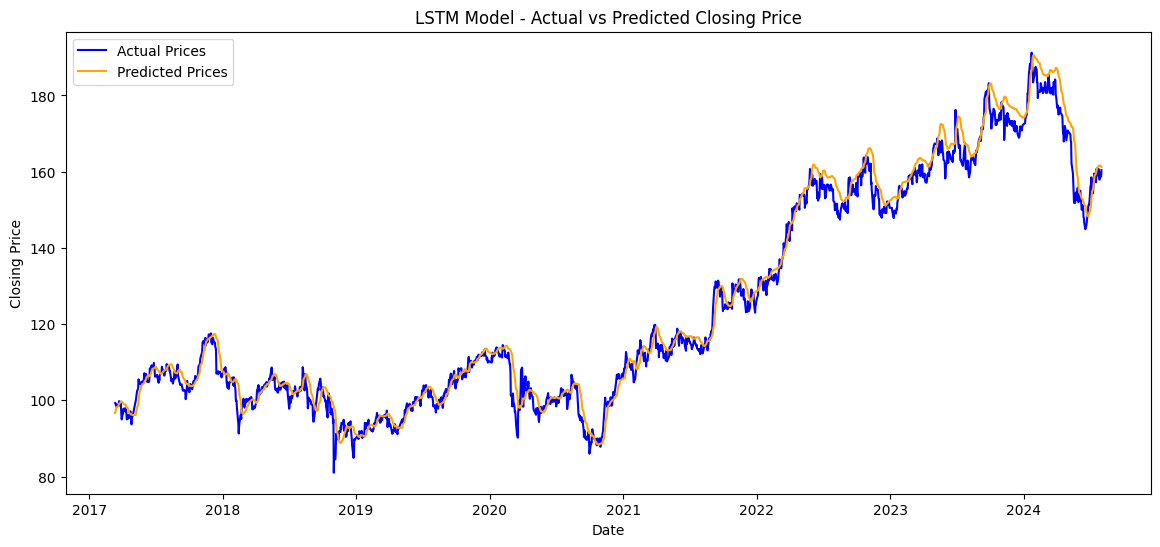

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Assume your dataframe is `data` with DateTimeIndex and already cleaned up features
df2 = data[['Closing Price', 'Price Spread', 'Daily Range', 'SMA_30', 'EMA_7', 'Volatility', 'Lag_1', 'Normalized Volume']]

# Step 1: Scaling the Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df2)

# Step 2: Create training and test data
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Step 3: Create data with time steps (LSTM input format)
def create_dataset(dataset, time_step=30):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, :])  # Take 'time_step' number of previous time steps
        y.append(dataset[i, 0])  # Predict the 'Closing Price' (index 0 in the dataset)
    return np.array(X), np.array(y)

# Reshape data for LSTM (30 previous time steps)
time_step = 30  # You can adjust the window size
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Step 4: Reshape the input to LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Step 5: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # To avoid overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))  # Fully connected layer
model.add(Dense(units=1))   # Output layer (predicting Closing Price)

# Step 6: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train the LSTM model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

# Step 8: Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Step 9: Inverse transform the predictions back to original scale
train_predict = scaler.inverse_transform(np.concatenate([train_predict, np.zeros((train_predict.shape[0], df2.shape[1]-1))], axis=1))[:, 0]
test_predict = scaler.inverse_transform(np.concatenate([test_predict, np.zeros((test_predict.shape[0], df2.shape[1]-1))], axis=1))[:, 0]
y_train = scaler.inverse_transform(np.concatenate([y_train.reshape(-1,1), np.zeros((y_train.shape[0], df2.shape[1]-1))], axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate([y_test.reshape(-1,1), np.zeros((y_test.shape[0], df2.shape[1]-1))], axis=1))[:, 0]

# Step 10: Evaluate the model
train_rmse = np.sqrt(np.mean((train_predict - y_train)**2))
test_rmse = np.sqrt(np.mean((test_predict - y_test)**2))
print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Step 11: Plot the results
plt.figure(figsize=(14,6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(df.index[-len(y_test):], test_predict, label='Predicted Prices', color='orange')
plt.title('LSTM Model - Actual vs Predicted Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


Let's try to improve accuracy by trying with different hyperparameters.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss improved from inf to 0.00047, saving model to best_model.keras

Epoch 2: val_loss improved from 0.00047 to 0.00025, saving model to best_model.keras

Epoch 3: val_loss did not improve from 0.00025

Epoch 4: val_loss did not improve from 0.00025

Epoch 5: val_loss did not improve from 0.00025
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss did not improve from 0.00025

Epoch 2: val_loss did not improve from 0.00025

Epoch 3: val_loss did not improve from 0.00025
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss did not improve from 0.00025

Epoch 2: val_loss did not improve from 0.00025

Epoch 3: val_loss improved from 0.00025 to 0.00019, saving model to best_model.keras

Epoch 4: val_loss did not improve from 0.00019

Epoch 5: val_loss improved from 0.00019 to 0.00015, saving model to best_model.keras

Epoch 6: val_loss did not improve from 0.00015

Epoch 7: val_loss did not improve from 0.00015

Epoch 8: val_loss did not improve from 0.00015
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss did not improve from 0.00015

Epoch 2: val_loss did not improve from 0.00015

Epoch 3: val_loss did not improve from 0.00015
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss did not improve from 0.00015

Epoch 2: val_loss did not improve from 0.00015

Epoch 3: val_loss did not improve from 0.00015
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss did not improve from 0.00015

Epoch 2: val_loss did not improve from 0.00015

Epoch 3: val_loss did not improve from 0.00015
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss did not improve from 0.00015

Epoch 2: val_loss improved from 0.00015 to 0.00011, saving model to best_model.keras

Epoch 3: val_loss improved from 0.00011 to 0.00009, saving model to best_model.keras

Epoch 4: val_loss improved from 0.00009 to 0.00008, saving model to best_model.keras

Epoch 5: val_loss did not improve from 0.00008

Epoch 6: val_loss did not improve from 0.00008

Epoch 7: val_loss did not improve from 0.00008
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss did not improve from 0.00008

Epoch 2: val_loss did not improve from 0.00008

Epoch 3: val_loss did not improve from 0.00008
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss did not improve from 0.00008

Epoch 2: val_loss did not improve from 0.00008

Epoch 3: val_loss did not improve from 0.00008
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss did not improve from 0.00008

Epoch 2: val_loss did not improve from 0.00008

Epoch 3: val_loss did not improve from 0.00008
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss did not improve from 0.00008

Epoch 2: val_loss did not improve from 0.00008

Epoch 3: val_loss did not improve from 0.00008
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss did not improve from 0.00008

Epoch 2: val_loss did not improve from 0.00008

Epoch 3: val_loss did not improve from 0.00008
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss did not improve from 0.00008

Epoch 2: val_loss did not improve from 0.00008

Epoch 3: val_loss did not improve from 0.00008
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss did not improve from 0.00008

Epoch 2: val_loss did not improve from 0.00008

Epoch 3: val_loss did not improve from 0.00008
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss did not improve from 0.00008

Epoch 2: val_loss did not improve from 0.00008

Epoch 3: val_loss did not improve from 0.00008
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss did not improve from 0.00008

Epoch 2: val_loss did not improve from 0.00008

Epoch 3: val_loss did not improve from 0.00008
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss did not improve from 0.00008

Epoch 2: val_loss did not improve from 0.00008

Epoch 3: val_loss did not improve from 0.00008
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss did not improve from 0.00008

Epoch 2: val_loss did not improve from 0.00008

Epoch 3: val_loss did not improve from 0.00008
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Best Model Hyperparameters: LSTM Units         100.000000
Batch Size          12.000000
Time Steps          30.000000
Epochs              20.000000
Training RMSE        3.689220
Validation RMSE      2.772545
Name: 7, dtype: float64


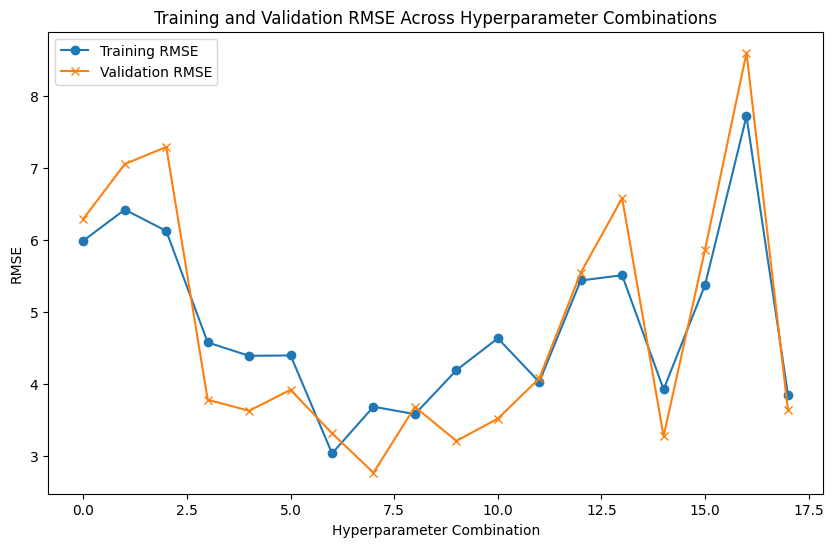

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Assume your dataframe is `data`
df2 = data[['Closing Price', 'Price Spread', 'Daily Range', 'SMA_30', 'EMA_7', 'Volatility', 'Lag_1', 'Normalized Volume']]

# Step 1: Scaling the Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df2)

# Step 2: Split into train and test
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create dataset function for LSTM
def create_dataset(dataset, time_step=30):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, :])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Save best model during training
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

# List of hyperparameters to try
lstm_units = [50, 100, 128]
batch_sizes = [12, 32, 64]
time_steps = [30]
epochs_list = [10, 20]

# Collect results in a list
results = []

for units in lstm_units:
    for batch_size in batch_sizes:
        for time_step in time_steps:
            for epochs in epochs_list:
                # Update time_step based on the current setting
                X_train, y_train = create_dataset(train_data, time_step)
                X_test, y_test = create_dataset(test_data, time_step)

                X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
                X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

                # Build the LSTM model
                model = Sequential()
                model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
                model.add(Dropout(0.2))
                model.add(LSTM(units=units, return_sequences=False))
                model.add(Dropout(0.2))
                model.add(Dense(units=25))
                model.add(Dense(units=1))

                # Compile the model
                model.compile(optimizer='adam', loss='mean_squared_error')

                # Train the model
                history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                    validation_data=(X_test, y_test),
                                    callbacks=[early_stopping, checkpoint], verbose=0)

                # Predict on training data
                train_predict = model.predict(X_train)
                test_predict = model.predict(X_test)

                # Inverse transform predictions to the original scale
                train_predict = scaler.inverse_transform(np.concatenate([train_predict, np.zeros((train_predict.shape[0], df2.shape[1]-1))], axis=1))[:, 0]
                test_predict = scaler.inverse_transform(np.concatenate([test_predict, np.zeros((test_predict.shape[0], df2.shape[1]-1))], axis=1))[:, 0]
                y_train = scaler.inverse_transform(np.concatenate([y_train.reshape(-1,1), np.zeros((y_train.shape[0], df2.shape[1]-1))], axis=1))[:, 0]
                y_test = scaler.inverse_transform(np.concatenate([y_test.reshape(-1,1), np.zeros((y_test.shape[0], df2.shape[1]-1))], axis=1))[:, 0]

                # Calculate RMSE for train and test sets
                train_rmse = np.sqrt(np.mean((train_predict - y_train)**2))
                val_rmse = np.sqrt(np.mean((test_predict - y_test)**2))

                # Save the results for this combination of hyperparameters
                results.append({
                    'LSTM Units': units,
                    'Batch Size': batch_size,
                    'Time Steps': time_step,
                    'Epochs': epochs,
                    'Training RMSE': train_rmse,
                    'Validation RMSE': val_rmse
                })

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Sort by Validation RMSE to find the best model
best_model_params = results_df.loc[results_df['Validation RMSE'].idxmin()]
print("Best Model Hyperparameters:", best_model_params)

# Step 4: Visualization (Optional)
plt.figure(figsize=(10, 6))
plt.plot(results_df['Training RMSE'], label='Training RMSE', marker='o')
plt.plot(results_df['Validation RMSE'], label='Validation RMSE', marker='x')
plt.title('Training and Validation RMSE Across Hyperparameter Combinations')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Step 5: Export the best model for future forecasting
# The model with the best hyperparameters is already saved as 'best_model.h5'


In [24]:
from keras.models import load_model

# Load the best saved model
model = load_model('best_model.keras')  # Update the filename if necessary


## Summary
Now, we can forecast values using this model.